# importing libraries


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random



# loading training and testing data

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 

# define network architecture using keras

In [30]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for the 10 classes
])



# display model architecture

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# compile the model

In [32]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model using SGD

In [33]:

# d. Train the model using SGD
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7042 - accuracy: 0.8062 - val_loss: 0.3625 - val_accuracy: 0.9026
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3774 - accuracy: 0.8924 - val_loss: 0.2907 - val_accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3177 - accuracy: 0.9103 - val_loss: 0.2520 - val_accuracy: 0.9283
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2812 - accuracy: 0.9197 - val_loss: 0.2265 - val_accuracy: 0.9367
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2564 - accuracy: 0.9273 - val_loss: 0.2077 - val_accuracy: 0.9414


# Evaluate the network 

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2077 - accuracy: 0.9414
Test accuracy: 0.9413999915122986


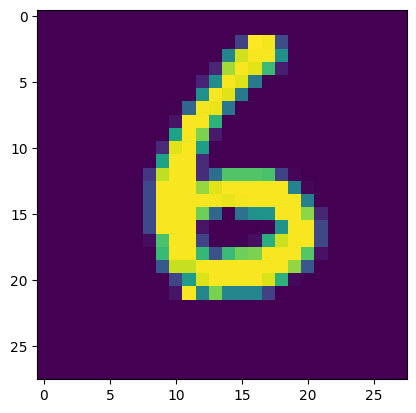

In [35]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [36]:
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))


313/313 [==============================] - 1s 3ms/step
The handwritten number in the image is 6


# plot the training loss and accuracy

In [37]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

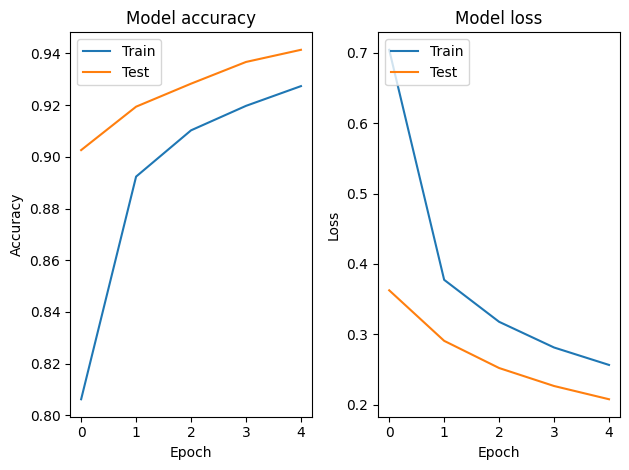

In [38]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()